# Part I - Dataset Exploration
## by Ana Pedra

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [122]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [123]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [124]:
print(df.shape[1], "columns")
print(df.shape[0], "rows\n")
print(df.dtypes)
print(df.info())


16 columns
183412 rows

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_stati

In [125]:
# Check the possible values in the categorical columns
for col in df.select_dtypes(include='object'):  # For each categorical column
    print(col, "\n", df[col].unique()[:10])     # Print its unique values (only up to 10)

start_time 
 ['2019-02-28 17:32:10.1450' '2019-02-28 18:53:21.7890'
 '2019-02-28 12:13:13.2180' '2019-02-28 17:54:26.0100'
 '2019-02-28 23:54:18.5490' '2019-02-28 23:49:58.6320'
 '2019-02-28 23:55:35.1040' '2019-02-28 23:41:06.7660'
 '2019-02-28 23:41:48.7900' '2019-02-28 23:49:47.6990']
end_time 
 ['2019-03-01 08:01:55.9750' '2019-03-01 06:42:03.0560'
 '2019-03-01 05:24:08.1460' '2019-03-01 04:02:36.8420'
 '2019-03-01 00:20:44.0740' '2019-03-01 00:19:51.7600'
 '2019-03-01 00:14:42.5880' '2019-03-01 00:08:02.7560'
 '2019-03-01 00:07:59.7150' '2019-03-01 00:07:17.0250']
start_station_name 
 ['Montgomery St BART Station (Market St at 2nd St)'
 'The Embarcadero at Steuart St' 'Market St at Dolores St'
 'Grove St at Masonic Ave' 'Frank H Ogawa Plaza'
 '4th St at Mission Bay Blvd S' 'Palm St at Willow St'
 'Washington St at Kearny St' 'Post St at Kearny St' 'Jones St at Post St']
end_station_name 
 ['Commercial St at Montgomery St' 'Berry St at 4th St'
 'Powell St BART Station (Market St at

## Data cleaning

In [126]:
# Check percentage of nan values in each column
df.isnull().sum() / len(df) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

Issue #1: Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns

In [127]:
# The percentage of rows with missing values is low (at worst 10%, but likely less if rows with a missing column have missing
# values in other columns). We consider that we can safely delete up to 30% of the dataset without endangering the conclusions.
df.dropna(inplace=True) # removes rows with na values
df.isnull().any().sum() # count number of rows with null values to check that it worked


0

Issue #2: start_time and end_time columns are in string (object)

In [129]:
# Convert the columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time']   = pd.to_datetime(df['end_time'])
df['end_time'][0] #  Check that it worked

Timestamp('2019-03-01 08:01:55.975000')

Issue #3: bike_id in string (object)

In [130]:
## Define: Convert the column to string(object)
df['bike_id'] =df.bike_id.astype(str)
type(df['bike_id'][0])

str

### What is the structure of your dataset?

There were initially 183,412 rides in the dataset with 16 features which was later dropped to 174952 rides and 21 features after fueature engineering. There are 2 datetime, 7 float, 1 int and 12 categorical(string) variables with no particular order.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding out at what time of the day and day of the week were most of the trips taken, and also what features affect the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the start_date variable will provide me the information needed for this findings because it will allow us to extract the day and week columns. I expect most trips to take place in the morning hour and weekdays.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


What is the average trip duration?

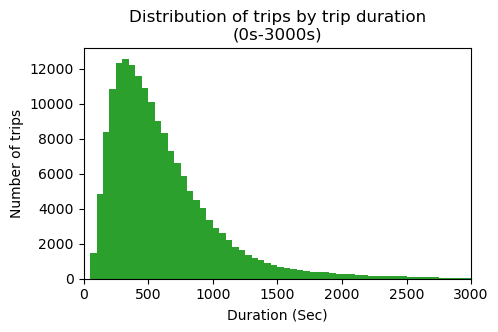

In [131]:
# We will divide the trip duration in 2 plots: Distribution of trips by trip duration (0s-3000s) and Distribution of trips by trip duration (3000s-100000s)
# start with a standard-scaled plot
binsize = 50
bins = np.arange(50, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[5, 3])
plt.hist(data = df, x = 'duration_sec', bins=bins, color=sb.color_palette()[2])
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of trips')
plt.title('Distribution of trips by trip duration\n(0s-3000s)')
plt.xlim([0, 3000]);

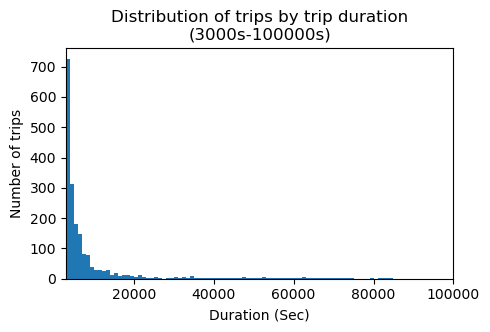

In [132]:
# Tail of the distribution
binsize = 1000
bins = np.arange(3000, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[5, 3])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of trips')
plt.title('Distribution of trips by trip duration\n(3000s-100000s)')
plt.xlim([3000, 100000])
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?



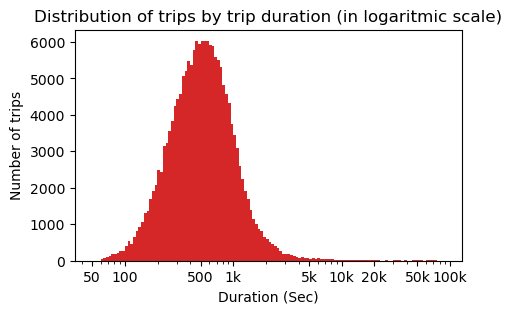

In [133]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[5, 3])
plt.hist(data = df, x = 'duration_sec', bins=bins, color=sb.color_palette()[3])
plt.xscale('log')
plt.xticks([50, 100, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5] , ['50', '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of trips')
plt.title('Distribution of trips by trip duration (in logaritmic scale)')
plt.show();

As observed in the plots, the duration follows a long-tailed distribution (right distribution). The maximum occurs around 500s. The majority of trips happen in the span of 250s-1000s.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Count how many trips are taken each day of the week

In [134]:
# Separate the datetime columns into 'day of the week' and 'hour'
df['start_day'] = pd.to_datetime(df['start_time']).dt.strftime('%A')
df['start_hr']  = pd.to_datetime(df['start_time']).dt.hour
df['end_day']   = pd.to_datetime(df['end_time']).dt.strftime('%A')
df['end_hr']    = pd.to_datetime(df['end_time']).dt.hour

# Make sure the days of the week are recognized as an ordered categorical column, so that they're plotted in order
col_dtype = pd.api.types.CategoricalDtype(ordered=True, categories=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
df['start_day'] = df['start_day'].astype(col_dtype)
df['end_day'] = df['start_day'].astype(col_dtype)

df.head(1) # Check that there are 4 new columns at the end

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hr,end_day,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,Thursday,8


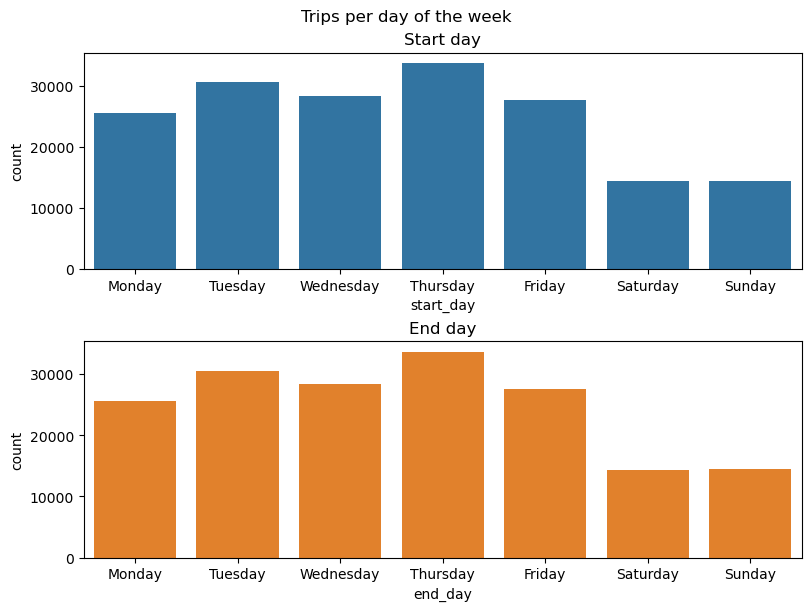

In [135]:
# Ride frequency per day of the week
fig, axs = plt.subplots(2, figsize = [8,6], constrained_layout=True)
fig.suptitle('Trips per day of the week')

default_color = sb.color_palette()[0] # Use blue for all bars, instead of random rainbow colors
sb.countplot(data=df, x='start_day', color=default_color, ax = axs[0])
sb.countplot(data=df, x='end_day',   color=sb.color_palette()[1], ax = axs[1])

axs[0].set_title('Start day')
axs[1].set_title('End day')

plt.show();


Most of the trips were taken (start and end days) on Thurdays, followed by Tuesdays, then, Friday, Wednesday and Monday.

Weekends (Saturdays and Sundays) have the lowest trip records

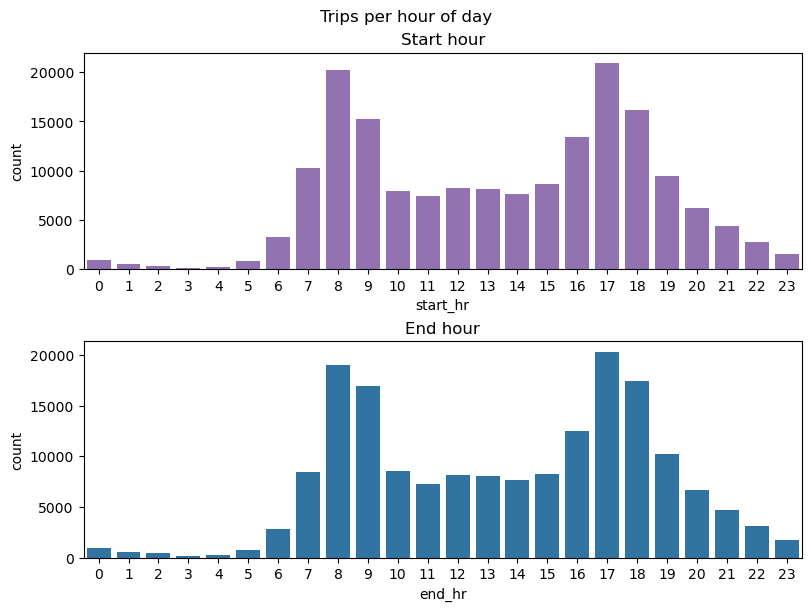

In [136]:
# Ride frequency per days
fig, axs = plt.subplots(2, figsize = [8,6], constrained_layout=True)
fig.suptitle('Trips per hour of day')

default_color = sb.color_palette()[0] # Use blue for all bars, instead of random rainbow colors
sb.countplot(data=df, x='start_hr', color=sb.color_palette()[4], ax = axs[0])
sb.countplot(data=df, x='end_hr',   color=default_color, ax = axs[1])

axs[0].set_title('Start hour')
axs[1].set_title('End hour')

plt.show();

As observed for the days, the 8th, 9th, 17th and 18th hours have the highest trip records. This is expected as it can be linked to morning rush and closing hour from work.
The 1st, 2nd, 3rd and 4th hours have the least trip records.

In [137]:
df['start_month'] = pd.to_datetime(df['start_time']).dt.month_name()
df['end_month']   = pd.to_datetime(df['end_time']).dt.month_name()

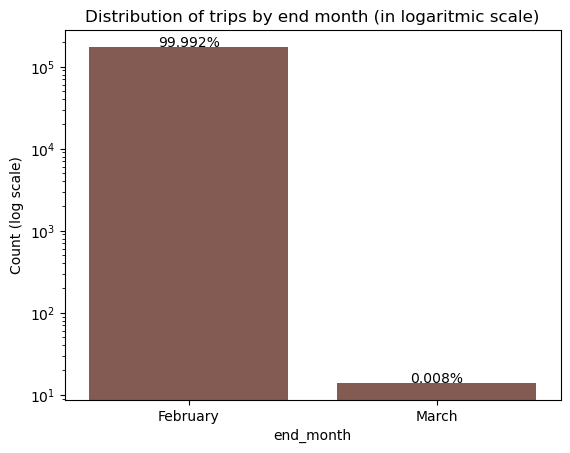

In [138]:
# The dataset is for february. Check if any trip ends on march, just in case

ax = sb.countplot(data = df, x = 'end_month',  color=sb.color_palette()[5], order=df.end_month.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')

plt.ylabel('Count (log scale)')
plt.yscale('log') # Use log scale because otherwise the second bar is too small to be visible
plt.title('Distribution of trips by end month (in logaritmic scale)')
plt.show();

A very small amount of trips start in February but end in the next month. We don't need to treat them.

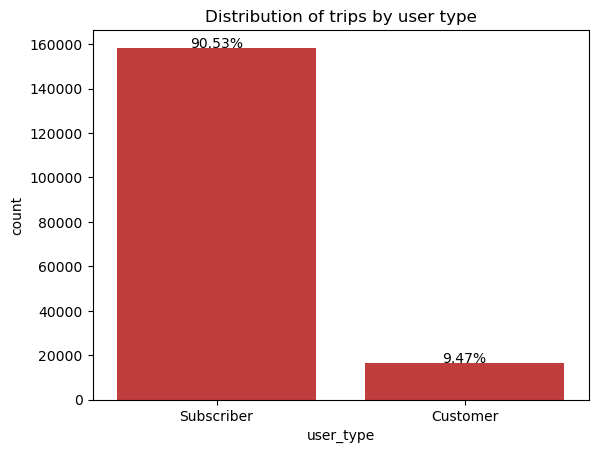

In [139]:
# Ride frequency per user type
ax = sb.countplot(data = df, x = 'user_type',  color=sb.color_palette()[3], order=df.user_type.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of trips by user type')
plt.show();

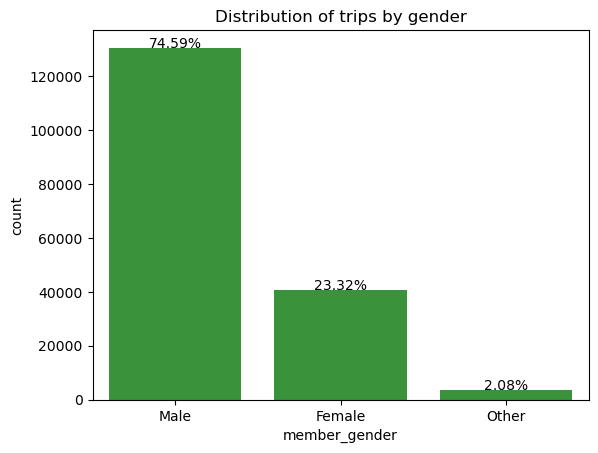

In [140]:
# ride frequency per gender
ax = sb.countplot(data=df, x='member_gender',  color=sb.color_palette()[2], order=df.member_gender.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of trips by gender')
plt.show();

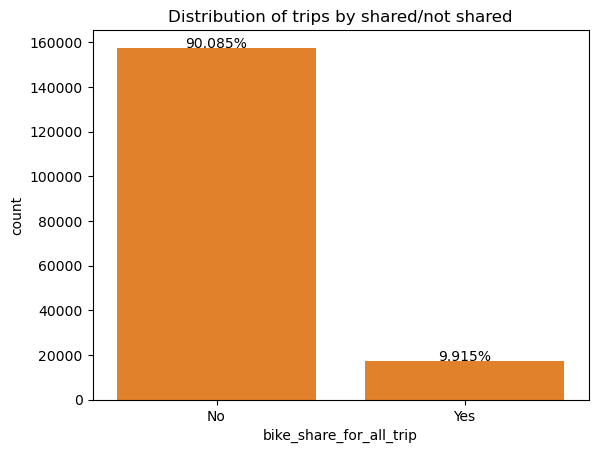

In [141]:
# ride frequency per bike_share_for_all_trip
ax = sb.countplot(data = df, x = 'bike_share_for_all_trip',  color=sb.color_palette()[1],
                  order=df.bike_share_for_all_trip.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
    plt.title('Distribution of trips by shared/not shared')

plt.show();

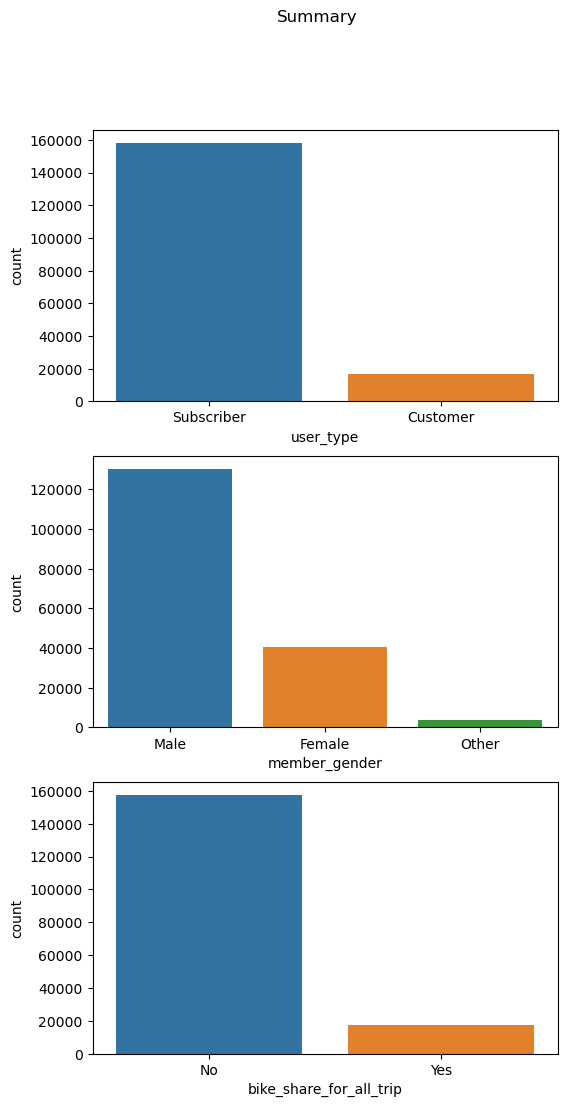

In [142]:
fig, axs = plt.subplots(3, figsize = [6,12])
fig.suptitle('Summary')

sb.countplot(data=df, x='user_type', order=df.user_type.value_counts().index, ax=axs[0])
sb.countplot(data=df, x='member_gender', order=df.member_gender.value_counts().index, ax=axs[1])
sb.countplot(data=df, x='bike_share_for_all_trip',  order=df.bike_share_for_all_trip.value_counts().index, ax=axs[2])

plt.show();

As observed in the 3 plots, the number of subscribers surpasses significantly the number of customers. The numbers of male bikers triples the number of female bikers and the big majority of users don't share a bike.

## Bivariate Exploration

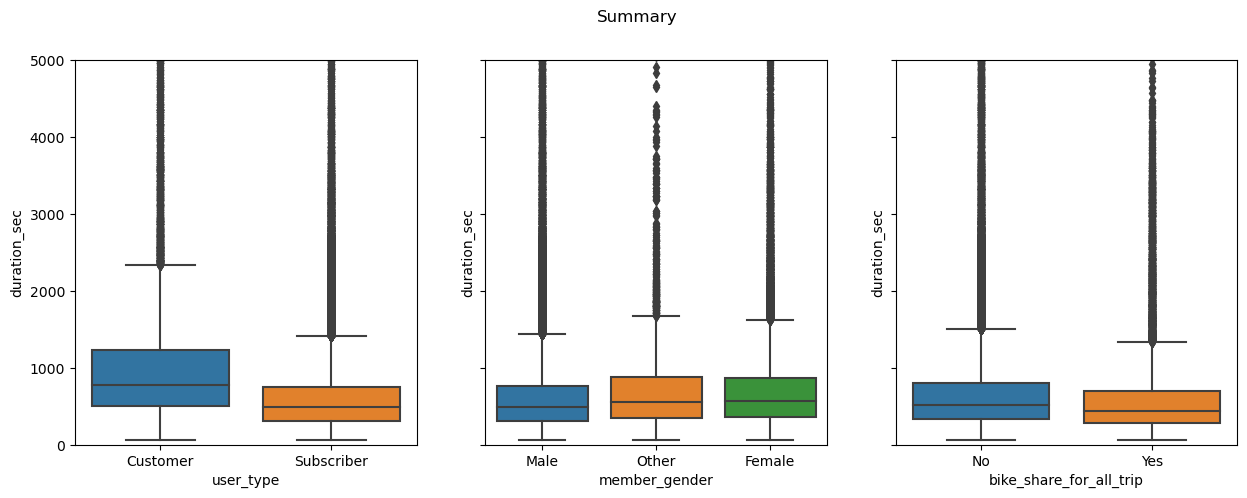

In [143]:
## Plot matrix of numeric features against categorical features.
fig, axs = plt.subplots(1,3, figsize = [15,5], sharey=True)
fig.suptitle('Trip duration by user type, gender, and bike sharing')

sb.boxplot(data=df, x='user_type', y='duration_sec', ax=axs[0])
sb.boxplot(data=df, x='member_gender', y='duration_sec', ax=axs[1])
sb.boxplot(data=df, x='bike_share_for_all_trip', y='duration_sec', ax=axs[2])

plt.setp(axs, ylim=[0,5000])    # Truncate y at 5000s (we don't care about outliers)
plt.show();

As we saw at the beginning of the study, trip duration is right-skewed with most trips taking a short time and most outliers taking a long time.

When we separate by categories, it appears that customers spend more time on average compared to subscribers, while the female gender spends higher time on average than male.

Bike share for all trip tends to be similar on average across all types.

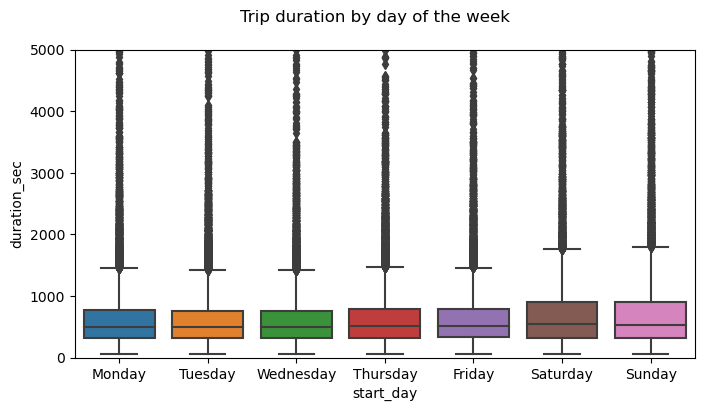

In [164]:
## Plot matrix of numeric features against categorical features.
fig, ax = plt.subplots(1, figsize = [8,4])
fig.suptitle('Trip duration by day of the week')

sb.boxplot(data=df, x='start_day', y='duration_sec', ax=ax)

plt.setp(ax, ylim=[0,5000])    # Truncate y at 5000s (we don't care about outliers)
plt.show();

There seems to be a correlation between day of the week and trip duration: the average trip duration remains constant from monday to friday, and then increases sharply on Saturday and Sunday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?



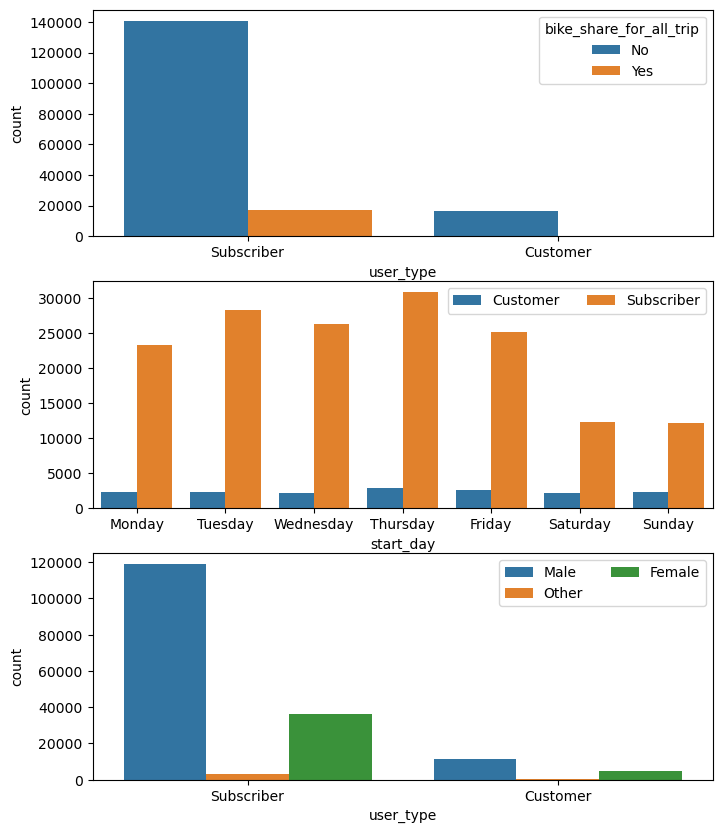

In [145]:
plt.figure(figsize = [8, 10])

# Subplot 1: user_type vs bike_share_for_all_trip
plt.subplot(3, 1, 1)
sb.countplot(data=df, x='user_type', hue='bike_share_for_all_trip', order=df.user_type.value_counts().index)

# Subplot 2: end_day vs user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data=df, x='start_day', hue='user_type')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# Subplot 3: user_type vs member_gender
ax = plt.subplot(3, 1, 3)
sb.countplot(data=df, x='user_type', hue='member_gender', order=df.user_type.value_counts().index)
ax.legend(loc=1, ncol=2) # Re-arrange legend to remove overlapping

plt.show();

There are no cases of bike sharing for normal customers. It could be that this is a service only available to subscribers.

Normal customers seem to ride equally often all days of the week. Subscribers are likely using the service to go to commute, as their use falls sharply on the weekends.

For both customers and subscribers, there seems to be a 3:1 male to female ratio, with a negligible share of 'Other'.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

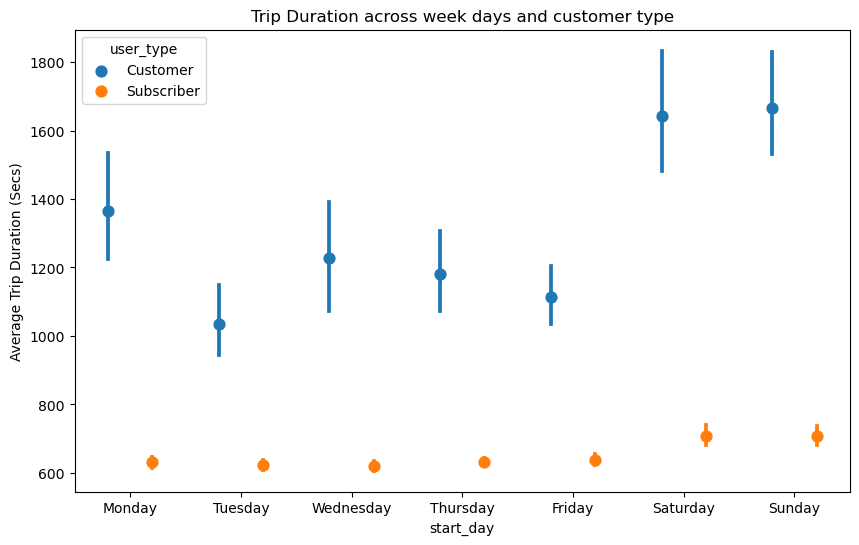

In [152]:
fig = plt.figure(figsize = [10,6])
sb.pointplot(data=df, x='start_day', y='duration_sec', hue='user_type', linestyles='', dodge=0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
plt.show();

Normal customers travel much longer distances than subscribers.

Both types of customers travel longer distances on weekends than during weekdays, and the increase is more evident for normal customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

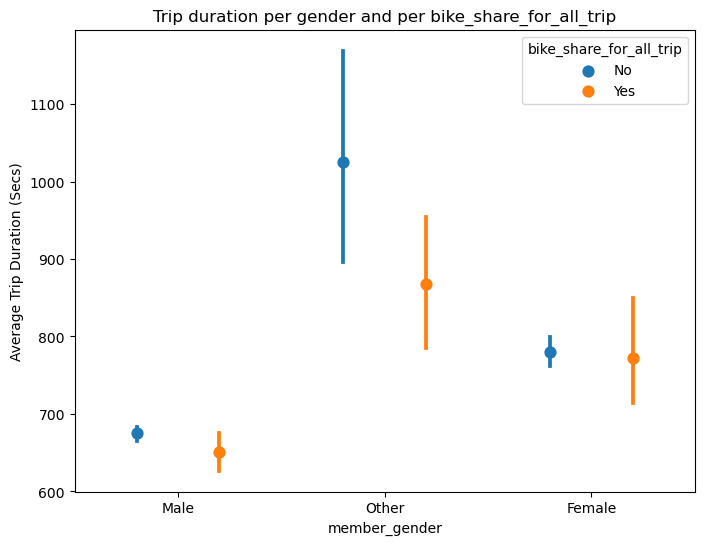

In [156]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data=df, x='member_gender', y='duration_sec', hue='bike_share_for_all_trip', linestyles='', dodge=0.4)
plt.title('Trip duration per gender and per bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
plt.show();

As observed in the graphic, the "Other" member_gender group has longest trip durations for bike sharing and non sharing. Female is the second group with the longest trip duration, followed by male.

### Were there any interesting or surprising interactions between features?

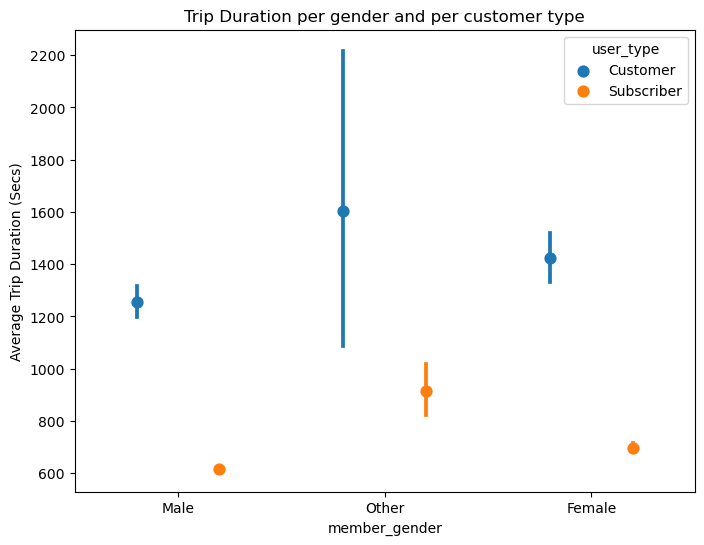

In [158]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data=df, x='member_gender', y='duration_sec', hue='user_type', linestyles='', dodge=0.4)
plt.title('Trip Duration per gender and per customer type')
plt.ylabel('Average Trip Duration (Secs)')
plt.show();

Of all the gender groups, the one that spent the most duration among both subscribers and customers were "Other", followed by female and then male.

## Conclusions


The analyzed data pertains to the months of February and March in the year 2019. 
The average trip duration was found to be around 500 seconds. 
The majority of trips occurred on Thursdays and Tuesdays, while weekends recorded the least number of trips. 
The busiest hours for trips were during morning and evening rush hours (8 and 9 AM, and 5 and 6 PM respectively). 
The majority of trips (90%) were taken by subscribers, with less than 10% being bike-sharing trips. 
The majority of trips were taken by males (over 70%). 
It was observed that customers had longer trip durations compared to subscribers, and females had longer trip durations than males. Additionally, trip durations on weekends were found to be longer than on weekdays. 
It should be noted that only subscribers are able to share bikes on trips. 
The data also indicated that customer type does not significantly affect the number of trips taken per weekday, but customers tend to travel for longer durations regardless of the day of the week in comparison to subscribers.